## Libraries

### Programming for Data Science (ID2214)

### Amir H. Rahnama (Twitter: @_ambodi)

#### Ph.D. Candidate 


<img src="https://www.kth.se/polopoly_fs/1.77259!/KTH_Logotyp_RGB_2013-2.svg" alt="kth_logo" style="width:200px;"/>

### Preface

In this lecture, we will be focusing on the use of libraries in our data science and Machine Learning projects. Just like the last lecture, our focus will be to solve the whole problem from the data gathering until modelling, so that you can have a grasp of how a *semi* real-world project works. 

The *outline* of this lecture are: 
* The Magic of Boosting Trees in practice
    * Sklearn's GradientBoostingClassifier
    * Xgboost's package
* A brief introduction to Artificial Neural Networks
    * What is an Artificial Neural Network? 
    * Training with Backpropagation
* How does XGBoost compare to a Multi-layer Perceptron? 
* Understanding how to wortk with Tensorflow and Keras
    * Modelling
    * Hyper-parameter Optimization
* Use GPUs in order to accelerate reading/manipulating/modelling of big chunks of data
    * Computation using GPU versions of Numpy and Pandas
    * Benchmarks on CPU/GPU version

### Adaptive Boosting and Gradient Boosting

We will be continuing today's lecture with more sophisticated ensemble trees, namely **AdaBoost** and **Gradient Boosting**. According to Wikipedia, in AdaBoost, the output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. 

As also mentioned in the Wikipedia article, Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. Gradient boosting is typically used with decision trees (especially CART trees) of a fixed size as base learners. 

In this lecture, we will be working with a different implementation of Gradient Boosting, namely XGBoost and more on that later, but for now, we will continue with Scikit Learn. 

We will show you the Sklearn's implementation of Adaptive and Gradient Boosting, namely **sklearn.ensemble.AdaBoostRegressor** and **sklearn.ensemble.GradientBoostingClassifier**.

In addition, in this lecture we will be working with regression so that you have had enough practical experience working with both classification and regression problems in this course. We will work with the famous Boston Housing Dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [1]:
from sklearn import datasets

boston = datasets.load_boston()

In [2]:
boston.data.shape

(506, 13)

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Here is a short description of the features:

   * **CRIM** : per capita crime rate by town
   * **ZN** : proportion of residential land zoned for lots over 25,000 sq.ft.
   * **INDUS** : proportion of non-retail business acres per town.
   * **CHAS** : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
   * **NOX** : nitric oxides concentration (parts per 10 million)
   * **RM** : average number of rooms per dwelling
   * **AGE** : proportion of owner-occupied units built prior to 1940
   * **DIS** : weighted distances to five Boston employment centres
   * **RAD** : index of accessibility to radial highways
   * **TAX** : full-value property-tax rate per 10,000 USD
   * **PTRATIO** : pupil-teacher ratio by town
   * **B** : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   * **LSTAT** : (percentage) lower status of the population
   * **MEDV** : Median value of owner-occupied homes in $1000's
   
And the targe values:

In [4]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Let us start by a simple case of comparison between Adaptive and Gradient Boosting, without thinking too much about the parameters and hyperparameter:

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

#Fix the random state
rng = np.random.RandomState(1)

#Divide the data
X_train, X_test, y_train, y_test = train_test_split(boston.data, 
                                                    boston.target, test_size=0.2, random_state=rng)

regr_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, random_state=rng),
                          n_estimators=300, random_state=rng)
regr_gboost = GradientBoostingRegressor(loss='quantile', 
                                  n_estimators=300,learning_rate=.1, max_depth=4, random_state=rng)

regr_ada.fit(X_train, y_train)
regr_gboost.fit(X_train, y_train)

y_ada = regr_ada.predict(X_test)
y_gboost = regr_gboost.predict(X_test)

In [6]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(19, 6), sharex=True, sharey=True)

ax[0].scatter(y_test, y_ada, label='Adaptive Boosting', alpha=0.7, color='red')
ax[0].plot(y_test, y_test, label='Groud Truth', alpha=0.7, color='green')
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predicted Values')
ax[0].legend()

ax[1].scatter(y_test, y_gboost, label='Gradient Boosting', alpha=0.7, color='blue')
ax[1].plot(y_test, y_test, label='Groud Truth', alpha=0.7, color='green')
ax[1].set_xlabel('True Values')
ax[1].legend()


fig.suptitle("Boston Housing Regression: Truth vs. Predicted")
plt.show()

<Figure size 1900x600 with 2 Axes>

### Error Analysis

In case of regression, usually we measure the error in prediction. **Mean Squared Error** and **Mean Absolute Error** and **R2 score** are common ways of measuring errors in your prediction. MSE is not very robust to outliers, therefore MAE is prefered when there is a case there are outliers in our dataset. R2 score shows the percentage of squared correlation between the predicted and real values of the target variable.

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_ada = mean_squared_error(y_test, y_ada)
mse_gboost = mean_squared_error(y_test, y_gboost)

mae_ada = mean_absolute_error(y_test, y_ada)
mae_gboost = mean_absolute_error(y_test, y_gboost)

r2_ada = r2_score(y_test, y_ada)
r2_gboost = r2_score(y_test, y_gboost)

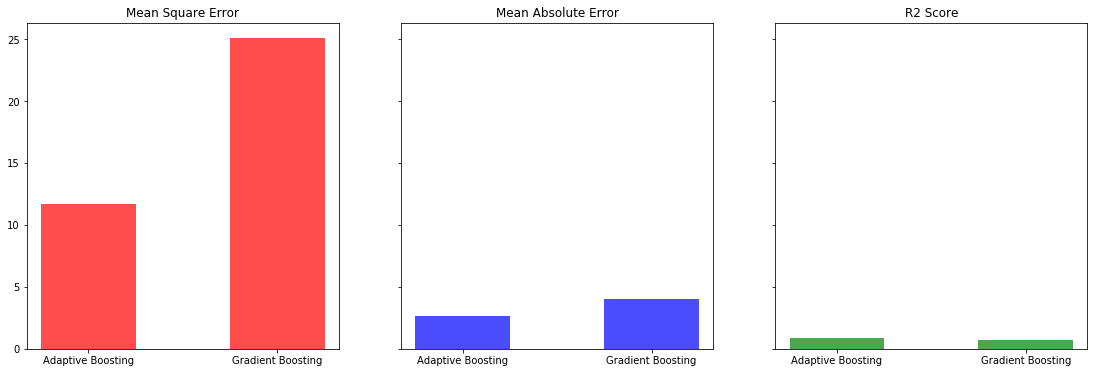

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(19, 6), sharex=True, sharey=True)

N = np.arange(2)
width = 0.5

ax[0].bar(N, [mse_ada, mse_gboost], width, label='Mean Square Error', alpha=0.7, color='red')
ax[0].set_xticks(N)
ax[0].set_xticklabels(('Adaptive Boosting', 'Gradient Boosting'))
ax[0].set_title('Mean Square Error')

ax[1].bar(N, [mae_ada, mae_gboost], width, label='Mean Asbolute Error', alpha=0.7, color='blue')
ax[1].set_xticks(N)
ax[1].set_xticklabels(('Adaptive Boosting', 'Gradient Boosting'))
ax[1].set_title('Mean Absolute Error')

ax[2].bar(N, [r2_ada, r2_gboost], width, label='R2 Score', alpha=0.7, color='green')
ax[2].set_xticks(N)
ax[2].set_xticklabels(('Adaptive Boosting', 'Gradient Boosting'))
ax[2].set_title('R2 Score')

plt.show()

In all three measures, Adaptive Boosting outperforms Gradient Boosting in all measures. The reason could be due to over-fitting of Gradient Boosting, since Gradient Boosting has a lot of key learning parameters to be adjusted. 

Speaking of hyper-parameters, let us perform a simple analysis of how a common parameter such as **max_depth** that is shared across all models is better tuned. Let us have a look:

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

max_depths = np.linspace(1, 32, 32, endpoint=True)

mse_ada_md = []
mse_gboost_md = []

mae_ada_md = []
mae_gboost_md = []

r2_ada_md = []
r2_gboost_md = []


for max_depth in max_depths:
    reg_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth),
                          n_estimators=300, random_state=rng)
    reg_gboost = GradientBoostingRegressor(loss='quantile', 
                                  n_estimators=300,learning_rate=.1, max_depth=4, 
                                  random_state=rng)

    reg_ada.fit(X_train, y_train)
    reg_gboost.fit(X_train, y_train)

    y_ada = reg_ada.predict(X_test)
    y_gboost = reg_gboost.predict(X_test)
    
    mse_ada_md.append(mean_squared_error(y_test, y_ada))
    mse_gboost_md.append(mean_squared_error(y_test, y_gboost))
    
    mae_ada_md.append(mean_absolute_error(y_test, y_ada))
    mae_gboost_md.append(mean_absolute_error(y_test, y_gboost))
    
    r2_ada_md.append(r2_score(y_test, y_ada))
    r2_gboost_md.append(r2_score(y_test, y_gboost))

So let us visualize the results in a pair gridplot between the *max_depth* and all of our errors:

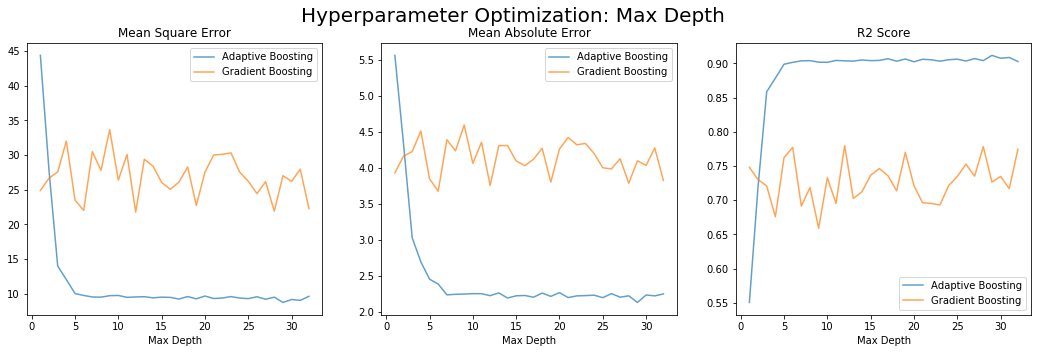

In [10]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

ax[0].plot(max_depths, mse_ada_md, label='Adaptive Boosting', alpha=0.7)
ax[0].plot(max_depths, mse_gboost_md, label='Gradient Boosting', alpha=0.7)
ax[0].set_xlabel('Max Depth')
ax[0].set_title("Mean Square Error")
ax[0].legend()

ax[1].plot(max_depths, mae_ada_md, label='Adaptive Boosting', alpha=0.7)
ax[1].plot(max_depths, mae_gboost_md, label='Gradient Boosting', alpha=0.7)
ax[1].set_xlabel('Max Depth')
ax[1].set_title("Mean Absolute Error")
ax[1].legend()

ax[2].plot(max_depths, r2_ada_md, label='Adaptive Boosting', alpha=0.7)
ax[2].plot(max_depths, r2_gboost_md, label='Gradient Boosting', alpha=0.7)
ax[2].set_xlabel('Max Depth')
ax[2].set_title("R2 Score")
ax[2].legend()

fig.suptitle('Hyperparameter Optimization: Max Depth', fontsize=20)

plt.show()

**Adaptive Boosting** performs best when the depth is more than 7, however its error stops to improve in both MSE and MAE case. **Gradient Boosting** respond the same way to the depth, however as you can see in the chart, **Gradient Boosting** fluctuates a lot with different *max_depth* values.

Let us fix the value of *max_depth* to 5 according to our trial, and continue with another common hyper-parameter across all three models, *min_samples_split*:

In [11]:
min_samples_splits = np.linspace(0.1, 1.0, 20, endpoint=True)

mse_ada_mss = []
mse_gboost_mss = []

mae_ada_mss = []
mae_gboost_mss = []

r2_ada_mss = []
r2_gboost_mss = []

for min_split in min_samples_splits:
    reg_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_split),
                          n_estimators=300, random_state=rng)
    reg_gboost = GradientBoostingRegressor(loss='quantile', min_samples_split=min_split,
                                  n_estimators=300,learning_rate=.1, max_depth=4, 
                                  random_state=rng)

    reg_ada.fit(X_train, y_train)
    reg_gboost.fit(X_train, y_train)

    y_ada = reg_ada.predict(X_test)
    y_gboost = reg_gboost.predict(X_test)
    
    mse_ada_mss.append(mean_squared_error(y_test, y_ada))
    mse_gboost_mss.append(mean_squared_error(y_test, y_gboost))
    
    mae_ada_mss.append(mean_absolute_error(y_test, y_ada))
    mae_gboost_mss.append(mean_absolute_error(y_test, y_gboost))
    
    r2_ada_mss.append(r2_score(y_test, y_ada))
    r2_gboost_mss.append(r2_score(y_test, y_gboost))

Let us plot the min sample splits across all types of errors:

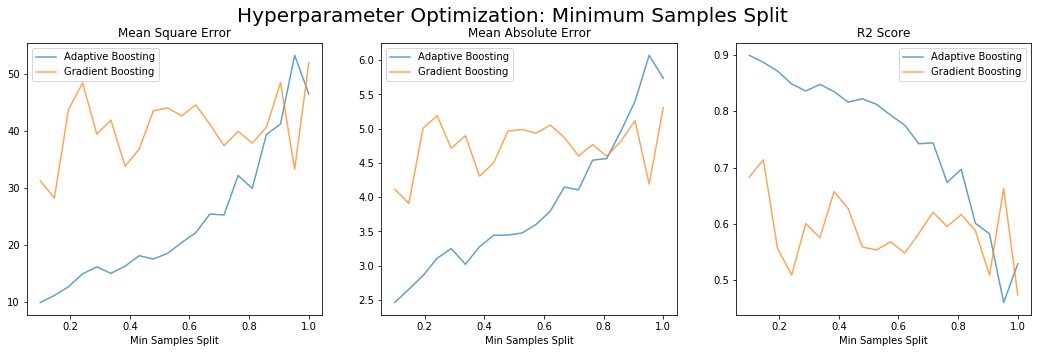

In [12]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

ax[0].plot(min_samples_splits, mse_ada_mss, label='Adaptive Boosting', alpha=0.7)
ax[0].plot(min_samples_splits, mse_gboost_mss, label='Gradient Boosting', alpha=0.7)
ax[0].set_xlabel('Min Samples Split')
ax[0].set_title('Mean Square Error')
ax[0].legend()

ax[1].plot(min_samples_splits, mae_ada_mss, label='Adaptive Boosting', alpha=0.7)
ax[1].plot(min_samples_splits, mae_gboost_mss, label='Gradient Boosting', alpha=0.7)
ax[1].set_xlabel('Min Samples Split')
ax[1].set_title('Mean Absolute Error')
ax[1].legend()

ax[2].plot(min_samples_splits, r2_ada_mss, label='Adaptive Boosting', alpha=0.7)
ax[2].plot(min_samples_splits, r2_gboost_mss, label='Gradient Boosting', alpha=0.7)
ax[2].set_xlabel('Min Samples Split')
ax[2].set_title('R2 Score')
ax[2].legend()

fig.suptitle('Hyperparameter Optimization: Minimum Samples Split', fontsize=20)

plt.show()

When looking at these charts, we can see that **Adaptive Boosting** performs best with small values of splits, i.e. *min_samples_split=10*, however Gradient Boosting performs *almost* the same at the 0.1 and 0.9 which needs further investigation in this case, however this will be outside of the scope of this lecture:

### XGboost

According to its documentation, "XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way." In short, XGboost is a highly optimized Gradient Boosting model. 

The model has many more advantages compare to the Scikit Learn's Gradient Boosting. It allows for a more detailed parameter and hyperparameter tuning, and so forth. For more information, read "XGBoost: A Scalable Tree Boosting System" by Chen and Guestrin (2016).

Let us have a look at how to load and predict the data using Xgboost. First we need to install the package:

In [13]:
!pip install xgboost

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 4, alpha = 10, n_estimators = 300, seed=1)

xg_reg.fit(X_train,y_train)

y_xgboost = xg_reg.predict(X_test)

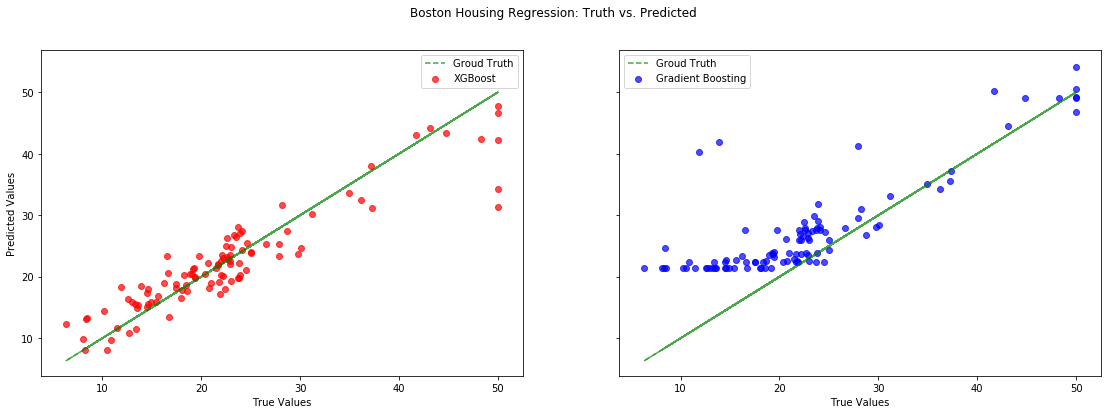

In [15]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(19, 6), sharex=True, sharey=True)

ax[0].scatter(y_test, y_xgboost, label='XGBoost', alpha=0.7, color='red')
ax[0].plot(y_test, y_test, label='Groud Truth', alpha=0.7, color='green', linestyle='--')
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predicted Values')
ax[0].legend()

ax[1].scatter(y_test, y_gboost, label='Gradient Boosting', alpha=0.7, color='blue')
ax[1].plot(y_test, y_test, label='Groud Truth', alpha=0.7, color='green', linestyle='--')
ax[1].set_xlabel('True Values')
ax[1].legend()


fig.suptitle("Boston Housing Regression: Truth vs. Predicted")
plt.show()

As mentioned before, the implementation details of the two models are different, however we choose the same values for the ones both share, which as you can see results in two different predictions. The fact checking of using different packages in your data science projects is of utmost importance, especially when comparing and benchmarking models. 

In this case, we knew that these two pacakges have been implemented differently. How does **XGboost** perform with regards to *max_depth*? Let us have a look:

In [16]:
import xgboost as xgb

max_depths = np.linspace(1, 32, 32).astype(np.int32)

mse_xgboost_md = []
mae_xgboost_md = []
r2_xgboost_md = []


for max_depth in max_depths:
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = max_depth, alpha = 10, n_estimators = 300, seed=1)
    xg_reg.fit(X_train,y_train)
    y_xgboost = xg_reg.predict(X_test)

    
    mse_xgboost_md.append(mean_squared_error(y_test, y_xgboost))
    mae_xgboost_md.append(mean_absolute_error(y_test, y_xgboost))
    r2_xgboost_md.append(r2_score(y_test, y_xgboost))

Let us look at the error between XGboost and Gradient Boosting from Sklearn:

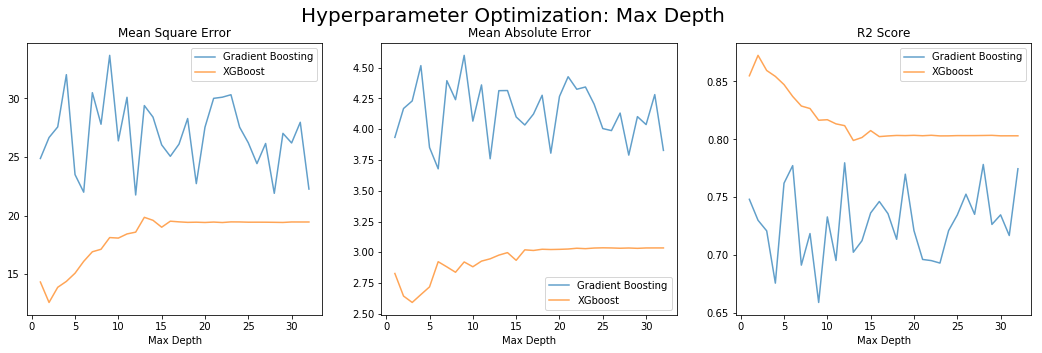

In [18]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

ax[0].plot(max_depths, mse_gboost_md, label='Gradient Boosting', alpha=0.7)
ax[0].plot(max_depths, mse_xgboost_md, label='XGBoost', alpha=0.7)
ax[0].set_xlabel('Max Depth')
ax[0].set_title("Mean Square Error")
ax[0].legend()

ax[1].plot(max_depths, mae_gboost_md, label='Gradient Boosting', alpha=0.7)
ax[1].plot(max_depths, mae_xgboost_md, label='XGboost', alpha=0.7)
ax[1].set_xlabel('Max Depth')
ax[1].set_title("Mean Absolute Error")
ax[1].legend()

ax[2].plot(max_depths, r2_gboost_md, label='Gradient Boosting', alpha=0.7)
ax[2].plot(max_depths, r2_xgboost_md, label='XGboost', alpha=0.7)
ax[2].set_xlabel('Max Depth')
ax[2].set_title("R2 Score")
ax[2].legend()

fig.suptitle('Hyperparameter Optimization: Max Depth', fontsize=20)

plt.show()

XGboost performs at its best in smaller depths and in all cases it out-performs the gradient boosting from Sklearn, which at this point should not a surprise, since XGboost enjoyts a much more optimized implementation.

We will finish this section with a short performance analysis of the package. One of the many reasons that **XGboost** is popular is due to its performance. Let us have a look:

### XGboost performance compared to Sklearn's Gradient Boosting

We will examine the performance differences between XGboost and Scikit Learn's implementation. We will check the performance at both training and prediction phases:

In [53]:
import xgboost as xgb
import time

fit_time_xgboost = []
pred_time_xgboost = []

repetitions = np.linspace(1, 100, 100).astype(np.int32)

for repetition in repetitions:
    start_fit_time_xgboost = time.time()
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = max_depth, alpha = 10, n_estimators = 300, seed=1)
    y_xgboost = xg_reg.fit(X_train,y_train)
    end_fit_time_xgboost = time.time()
    
    start_pred_time_xgboost = time.time()
    y_xgboost = xg_reg.predict(X_test)
    end_pred_time_xgboost = time.time()
    
    fit_time_xgboost.append(end_fit_time_xgboost - start_fit_time_xgboost)
    pred_time_xgboost.append(end_pred_time_xgboost - start_pred_time_xgboost)

fit_time_gboost = []
pred_time_gboost = []

for repetition in repetitions:
    start_fit_time_gboost = time.time()
    regr_gboost = GradientBoostingRegressor(loss='quantile', 
                                  n_estimators=300,learning_rate=.1, max_depth=4, random_state=rng)
    regr_gboost.fit(X_train, y_train)
    end_fit_time_gboost = time.time()
    
    start_pred_time_gboost = time.time()
    y_gboost = regr_gboost.predict(X_test)
    end_pred_time_gboost = time.time()
    
    fit_time_gboost.append(end_fit_time_gboost - start_fit_time_gboost)
    pred_time_gboost.append(end_pred_time_gboost - start_pred_time_gboost)
    

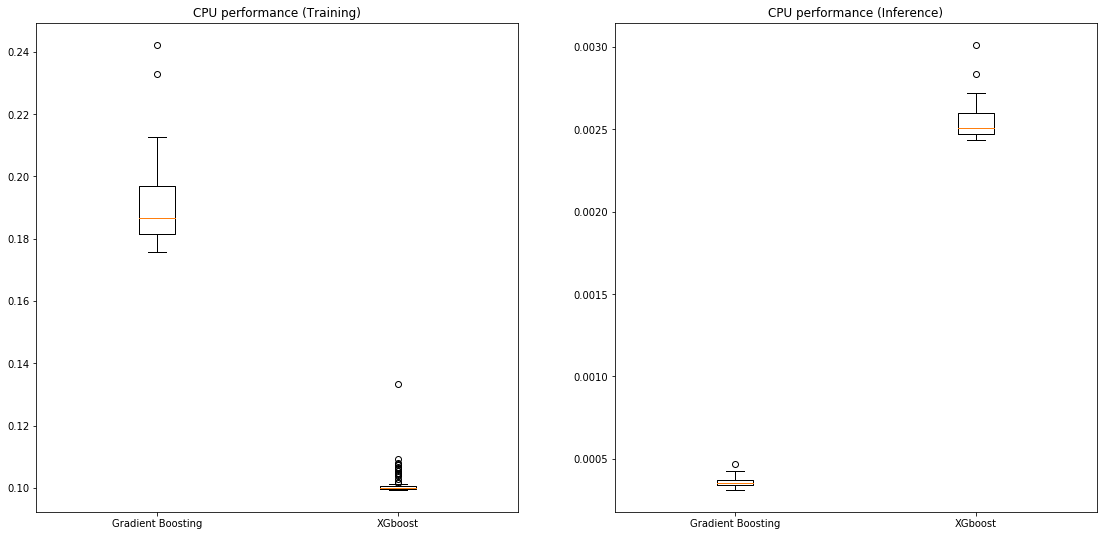

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(19, 9))

ax[0].set_title('CPU performance (Training)')
ax[0].boxplot([fit_time_gboost, fit_time_xgboost])
ax[0].set_xticklabels(('Gradient Boosting', 'XGboost'))

ax[1].set_title('CPU performance (Inference)')
ax[1].boxplot([pred_time_gboost, pred_time_xgboost])
ax[1].set_xticklabels(('Gradient Boosting', 'XGboost'))

plt.show()

As expected, XGboost outperforms the Gradient Boosting, however we see another interesting result that Scikit Learn outperforms the XGboost in the prediction phase. This needs further investigation, bearing in mind that the implementations are very different in many aspects.

### Tensorflow

### GPU-acceleration

In recent years, due to the huge growth in digitalizatio, a huge growth is digital footprint is visible. This increase has led to the use of larger computational powers to accelerate our computational power. These days, it is affordable to buy GPU units for our Personal Computers (PC) or even use cloud-based services. In this tutorial, I am using my PC's GPU unit.GPUs are all computational performances are very sensitive to the settings you are running them. You need to be at least careful regarding comparing approaches in at least three dimensions:

* Operating System (OS)
* Central processing unit (CPU) 
* Graphical processing unit (GPU)

Let us go through ways to check the information we are using in this tutorial: 

#### Operating System (OS)

In [19]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.1 LTS
Release:	18.04
Codename:	bionic


#### Central Processing Unit

In [20]:
!cat /proc/cpuinfo  | grep 'name'| uniq

model name	: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz


#### Graphical Processing Unit

In order to get information about your GPU, you can run the following command in UBUNTU:

In [21]:
!lspci  -v -s  $(lspci | grep ' VGA ' | cut -d" " -f 1)

01:00.0 VGA compatible controller: NVIDIA Corporation GP104 [GeForce GTX 1080] (rev a1) (prog-if 00 [VGA controller])
	Subsystem: ASUSTeK Computer Inc. GP104 [GeForce GTX 1080]
	Flags: bus master, fast devsel, latency 0, IRQ 131
	Memory at de000000 (32-bit, non-prefetchable) [size=16M]
	Memory at c0000000 (64-bit, prefetchable) [size=256M]
	Memory at d0000000 (64-bit, prefetchable) [size=32M]
	I/O ports at e000 [size=128]
	[virtual] Expansion ROM at 000c0000 [disabled] [size=128K]
	Capabilities: <access denied>
	Kernel driver in use: nvidia
	Kernel modules: nvidiafb, nouveau, nvidia_drm, nvidia



You also need to check your GPU drivers, especially CUDA for this tutorial: 

In [22]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


### Numba

### Cupy

CuPy is an open-source matrix library accelerated with NVIDIA CUDA. It also uses CUDA-related libraries including cuBLAS, cuDNN, cuRand, cuSolver, cuSPARSE, cuFFT and NCCL to make full use of the GPU architecture. 

In [23]:
!pip install cupy-cuda90

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
import numpy as np
import cupy as cp

#### Benchmarks: Numpy vs. Cupy

#### Matrix Multiplication

Let us build a case first for GPU enabled computation. Imagne you have two matrices and you would like to perform matrix multiplication, as we increase the size of the dimensions, we start to hit an issue: 

In [25]:
import time

time_per_dimension_cpu = {}
dimensions = [20, 50, 100, 500, 1000, 2000, 5000, 8000, 10000, 20000, 50000]

for dim in dimensions: 
    print('Calcualting a Matrix for dim: {}'.format(dim))
    
    start = time.time()
    
    a = np.random.rand(dim, dim)
    b = np.random.rand(dim, dim)
    c = np.matmul(a, b)
    
    end = time.time()
    
    # Free up variables for garbage collector
    a = None
    b = None
    c = None
    
    time_per_dimension_cpu[dim] = end - start

Calcualting a Matrix for dim: 20
Calcualting a Matrix for dim: 50
Calcualting a Matrix for dim: 100
Calcualting a Matrix for dim: 500
Calcualting a Matrix for dim: 1000
Calcualting a Matrix for dim: 2000
Calcualting a Matrix for dim: 5000
Calcualting a Matrix for dim: 8000
Calcualting a Matrix for dim: 10000
Calcualting a Matrix for dim: 20000
Calcualting a Matrix for dim: 50000


MemoryError: 

A MemoryError hits us at 50000 as our initial dimension. Let us run the code once again with less dimensions: 

In [ ]:
import time

time_per_dimension_cpu = {}
dimensions = [20, 50, 100, 500, 1000, 2000, 5000, 8000, 10000, 20000]

for dim in dimensions: 
    print('Calcualting a Matrix for dim: {}'.format(dim))
    
    start = time.time()
    
    a = np.random.rand(dim, dim)
    b = np.random.rand(dim, dim)
    c = np.matmul(a, b)
    
    end = time.time()
    
    # Free up variables for garbage collector
    a = None
    b = None
    c = None
    
    time_per_dimension_cpu[dim] = end - start

Let us look at the result:

In [ ]:
time_per_dimension_cpu

### Cupy

In [ ]:
import time

time_per_dimension_gpu = {}
dimensions = [20, 50, 100, 500, 1000, 2000, 5000, 8000, 10000, 20000]

for dim in dimensions: 
    print('Calcualting a Matrix for dim: {}'.format(dim))
    
    start = time.time()
    
    a = cp.random.rand(dim, dim)
    b = cp.random.rand(dim, dim)
    c = cp.matmul(a, b)
    
    end = time.time()
    
    # Free up variables for garbage collector
    a = None
    b = None
    c = None
    
    time_per_dimension_gpu[dim] = end - start

Okay so now we have come to realize one drawback of using GPU computations. In the CPU computation phase, after a MemoryError happened after 50000 as our initial dimension however in GPU computation with Cupy, due to the fact that GPUs have less memory, the OutOfMemoryError is happening at 2000. This is something that you need to know, although CPU compuations can be slower, CPU can have access to more memory, since they are cheaper and much more accessible. 

Let us run the code with less dimensions:

In [ ]:
import time

time_per_dimension_gpu = {}
dimensions = [20, 50, 100, 500, 1000, 2000, 5000, 8000, 10000]

for dim in dimensions: 
    print('Calcualting a Matrix for dim: {}'.format(dim))
    
    start = time.time()
    
    a = cp.random.rand(dim, dim)
    b = cp.random.rand(dim, dim)
    c = cp.matmul(a, b)
    
    end = time.time()
    
    # Free up variables for garbage collector
    a = None
    b = None
    c = None
    
    time_per_dimension_gpu[dim] = end - start

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


fig, axs = plt.subplots(1, 1, figsize=(11, 9), sharey=True)
axs.scatter(time_per_dimension_cpu.keys(), time_per_dimension_cpu.values(), alpha=0.7, label='CPU')
axs.scatter(time_per_dimension_gpu.keys() , time_per_dimension_gpu.values(), alpha=0.7, label='GPU')

axs.legend()

axs.set_xlabel('Matrix Multiplication Dimensions')
axs.set_ylabel('Matrix Multiplication Dimensions')

plt.show()

### Tensorflow with GPU